In [1]:
import os
from dotenv import load_dotenv
from pymongo import MongoClient
from MongoDBDataset import create_dataset, features_and_labels
import matplotlib.pyplot as plt
import tensorflow as tf

load_dotenv()
%matplotlib inline

In [2]:
client = MongoClient(os.environ["URI"])
db = client.flowers
N_CLASSES = len(db.test.distinct("category"))

In [3]:
collection=db.test

for mongodb_document in collection.find({}).sort("_id", ):
    label = mongodb_document["flower_type"]
    # features = Image.open(io.BytesIO(mongodb_document["data"]))
    print(label)

carnation
carnation
carnation
carnation
carnation
carnation
carnation
iris
iris
iris
iris
iris
iris
iris
bellflower
bellflower
bellflower
bellflower
bellflower
bellflower
bellflower
california_poppy
california_poppy
california_poppy
california_poppy
california_poppy
california_poppy
california_poppy
rose
rose
rose
rose
rose
rose
rose
astilbe
astilbe
astilbe
astilbe
astilbe
astilbe
astilbe
tulip
tulip
tulip
tulip
tulip
tulip
tulip
calendula
calendula
calendula
calendula
calendula
calendula
calendula
dandelion
dandelion
dandelion
dandelion
dandelion
dandelion
dandelion
coreopsis
coreopsis
coreopsis
coreopsis
coreopsis
coreopsis
coreopsis
black_eyed_susan
black_eyed_susan
black_eyed_susan
black_eyed_susan
black_eyed_susan
black_eyed_susan
black_eyed_susan
water_lily
water_lily
water_lily
water_lily
water_lily
water_lily
water_lily
sunflower
sunflower
sunflower
sunflower
sunflower
sunflower
sunflower
common_daisy
common_daisy
common_daisy
common_daisy
common_daisy
common_daisy
common_daisy

In [4]:
train_dataset = create_dataset(db.train, batch_size=3, mode="train")
eval_dataset = create_dataset(db.test, batch_size=1, mode="test")

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


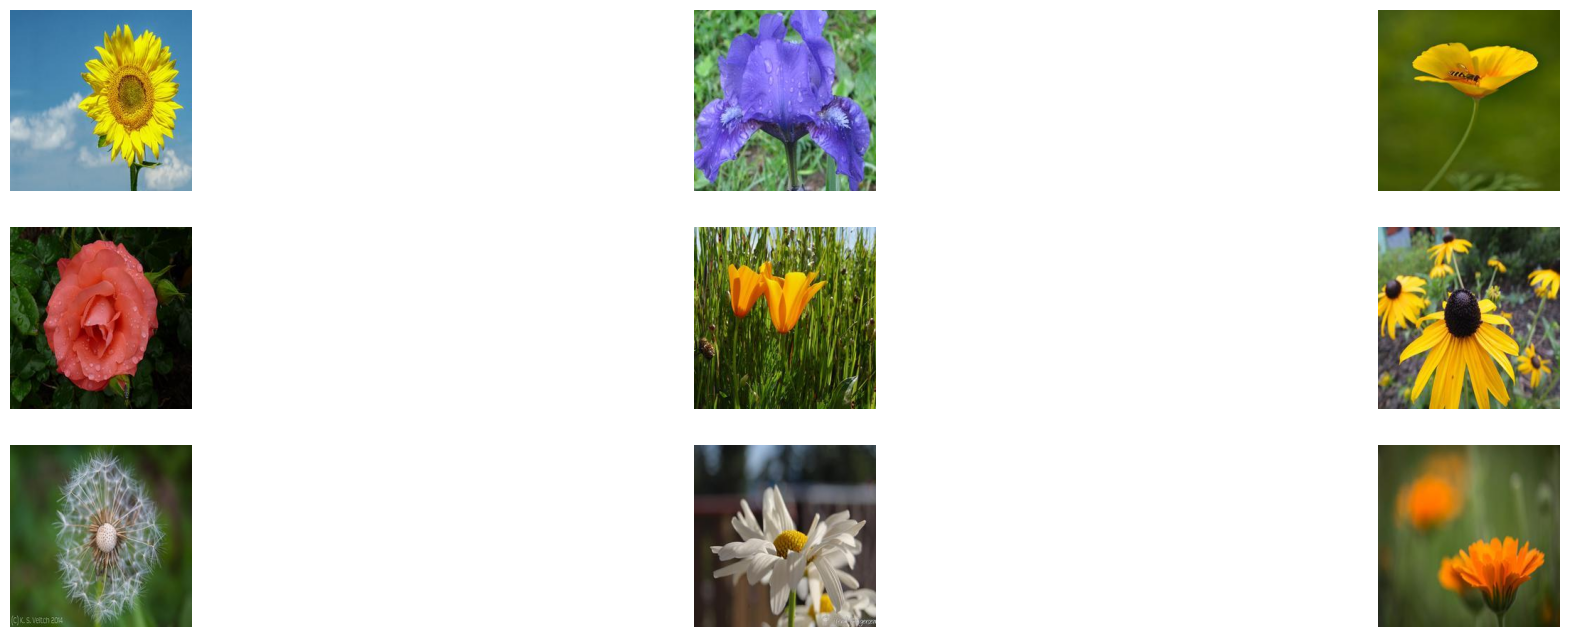

In [5]:
n_plots = 3*3
fig = plt.figure(figsize=(25,25))

for n_image, (data, label) in enumerate(train_dataset.take(3), start=1):
    for i in range(3):
        print(tf.reduce_min(data[i]))
        fig.add_subplot(n_plots, 3, (n_image-1)*3+i+1)
        plt.imshow(data[i].numpy().astype(int).squeeze())
        plt.axis("off")

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


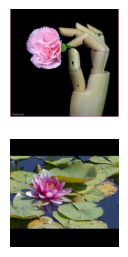

In [6]:
n_plots = 5 * 3
fig = plt.figure(figsize=(25, 25))

for n_image, (data, label) in enumerate(eval_dataset.take(2), start=1):
    print(tf.reduce_min(data))
    fig.add_subplot(n_plots, 1, n_image)
    plt.imshow(data.numpy().astype(int).squeeze())
    plt.axis("off")

In [7]:
client.close()